# Author : Thathsarani Malavi Arachchi
**Background**

Wearable healthcare devices have gained significant attention for their ability to provide continuous, real-time physiological monitoring. However, existing solutions often suffer from limited predictive capabilities, lack of integration with machine learning (ML) models, and challenges in deploying AI on edge devices.

**Objective**

This study presents a novel AI-powered smart ring designed for real-time health monitoring and disease prediction using multimodal sensor data. The proposed system integrates heart rate (HR), oxygen saturation (SpO2), body temperature sensors to detect early signs of health anomalies.

Notebook 2.ipynb (will focus on model development and the evaluation of prediction accuracy using RNN.)


# Lists all imported libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

In [ ]:
#Load the Dataset(cleaned & Prepared Datasets)
data_frame = pd.read_csv('/content/Health_Monitoring_and Disease_Prediction_Clean_dataset.csv')

In [ ]:
data_frame.head()

,Heart Rate,Body Temperature,SpO2,Age,Gender,Risk Category
0,60,36.861707,95.702046,37,0,High Risk
1,63,36.511633,96.689413,77,1,High Risk
2,63,37.052049,98.508265,68,0,Low Risk
3,99,36.654748,95.011801,41,0,High Risk
4,69,36.975098,98.623792,25,0,High Risk


In [ ]:
data_frame.tail()

,Heart Rate,Body Temperature,SpO2,Age,Gender,Risk Category
200015,87,37.058905,95.357470,75,1,Low Risk
200016,76,36.463631,99.340786,76,1,Low Risk
200017,81,36.665477,98.120530,18,0,Low Risk
200018,83,37.019873,95.362426,66,0,High Risk
200019,69,37.012931,99.523058,67,0,Low Risk


In [ ]:
# Check dimensions and datatypes
print("shape = ",data_frame.shape)
print(".....")
print("Information of Dataset")
data_frame.info()

shape =  (200020, 6)
.....
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Heart Rate        200020 non-null  int64  
 1   Body Temperature  200020 non-null  float64
 2   SpO2              200020 non-null  float64
 3   Age               200020 non-null  int64  
 4   Gender            200020 non-null  int64  
 5   Risk Category     200020 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 9.2+ MB


In [ ]:
data_frame.loc[data_frame['Risk Category']=='Low Risk','Risk Category']=0
data_frame.loc[data_frame['Risk Category']=='High Risk','Risk Category']=1

In [ ]:
# Devide dataset to training and test
X = data_frame.drop(['Risk Category'], axis=1)
Y = data_frame['Risk Category']

In [ ]:
Y = Y.astype('int')

In [ ]:
X.head()

,Heart Rate,Body Temperature,SpO2,Age,Gender
0,60,36.861707,95.702046,37,0
1,63,36.511633,96.689413,77,1
2,63,37.052049,98.508265,68,0
3,99,36.654748,95.011801,41,0
4,69,36.975098,98.623792,25,0


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Heart Rate', 'Body Temperature','SpO2','Age','Gender'])

In [ ]:
X.head()

,Heart Rate,Body Temperature,SpO2,Age,Gender
0,-1.690814,0.261613,-1.249365,-0.791190,-0.998931
1,-1.431138,-0.546333,-0.564926,1.133112,1.001070
2,-1.431138,0.700908,0.695894,0.700144,-0.998931
3,1.684972,-0.216034,-1.727839,-0.598760,-0.998931
4,-0.911787,0.523310,0.775977,-1.368481,-0.998931


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Heart Rate        200020 non-null  float64
 1   Body Temperature  200020 non-null  float64
 2   SpO2              200020 non-null  float64
 3   Age               200020 non-null  float64
 4   Gender            200020 non-null  float64
dtypes: float64(5)
memory usage: 7.6 MB


In [ ]:
Y[:5]

,Risk Category
0,1
1,1
2,0
3,1
4,1


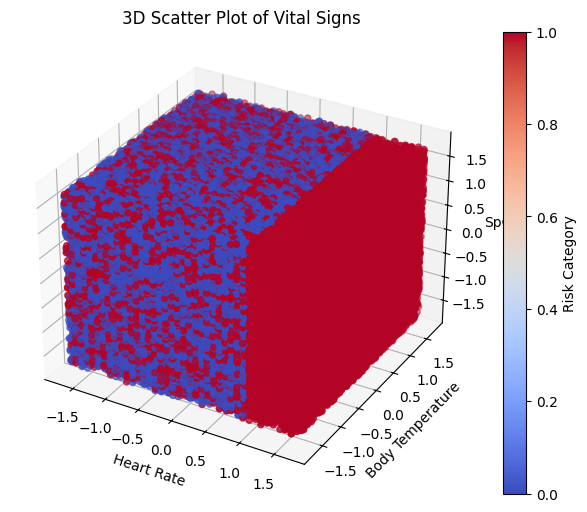

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X['Heart Rate'], X['Body Temperature'], X['SpO2'], c=Y, cmap='coolwarm')
plt.colorbar(sc, label='Risk Category')
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Body Temperature')
ax.set_zlabel('SpO2')
plt.title('3D Scatter Plot of Vital Signs')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((160016, 5), (40004, 5))

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# IMPORTANT: Only apply SMOTE to your TRAINING data
# DO NOT apply it to your x_test or y_test
print(f"Before SMOTE, X_train shape: {X_train.shape}")
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)
print(f"After SMOTE, X_train shape: {x_train_resampled.shape}")

Before SMOTE, X_train shape: (160016, 5)
After SMOTE, X_train shape: (168332, 5)


# Model Building

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(64, activation='relu',),
    tf.keras.layers.Dense(32, activation='relu',),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dense(64, activation='relu',),
    tf.keras.layers.Dense(32, activation='relu',),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(x_train_resampled, y_train_resampled, batch_size=16, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10521/10521 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.7012 - loss: 0.5392
Epoch 2/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.7122 - loss: 0.5209
Epoch 3/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7126 - loss: 0.5182
Epoch 4/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.7146 - loss: 0.5163
Epoch 5/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.7119 - loss: 0.5181
Epoch 6/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7123 - loss: 0.5176
Epoch 7/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7129 - loss: 0.5161
Epoch 8/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.7128 - loss: 0.5169
Epoch 9/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7153 - loss: 0.5161
Epoch 10/10
10521/10521 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7155 - loss: 0.5146


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,093 (301.15 KB)

 Trainable params: 25,697 (100.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,396 (200.77 KB)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

1251/1251 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[1.        ],
       [0.35393924],
       [0.35392216],
       [0.35393924],
       [0.35393924]], dtype=float32)

In [ ]:
Y_test[:5]

,Risk Category
79154,1
160758,0
101535,0
57250,1
70287,0


# Evaluate Model

In [ ]:
# Using evaluate method
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Neural Network Accuracy: {accuracy * 100:.2f}%")
print(f"Neural Network loss: {loss * 100:.2f}%")

1251/1251 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7014 - loss: 0.5195
Neural Network Accuracy: 70.18%
Neural Network loss: 51.78%


In [ ]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(Y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(Y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.43056946992874146>

1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


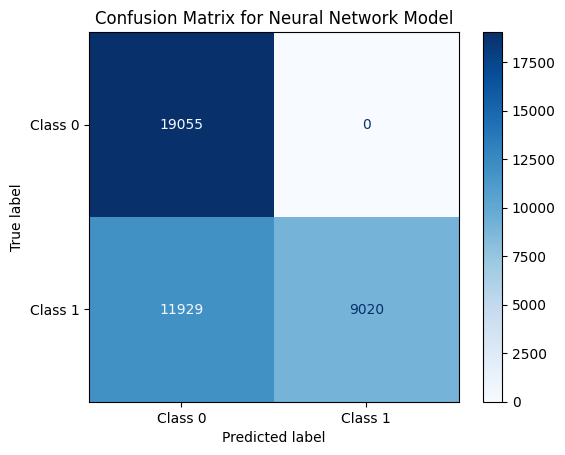

Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     19055
           1       1.00      0.43      0.60     20949

    accuracy                           0.70     40004
   macro avg       0.81      0.72      0.68     40004
weighted avg       0.82      0.70      0.68     40004



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1️⃣ Make predictions on the test set
# The model outputs probabilities between 0 and 1 → convert them to 0 or 1
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # convert probabilities to binary classes

# 2️⃣ Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Neural Network Model")
plt.show()

# 3️⃣ Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Variation of loss and accuracy

<Axes: >

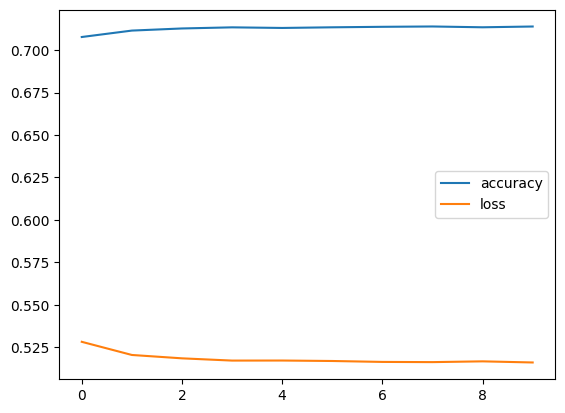

In [ ]:
pd.DataFrame(history.history).plot()